# Домашнее задание №2 - Линейные модели. Градиентный спуск

В этом домашнем задании мы с вами научимся обучать линейные модели регрессии и классификации при помощи очень мощного, но в то же время довольно понятного алгоритма, который называется **градиетный спуск**. Помимо линейных моделей он используется и для обучения самых сложных нейронных сетей! Также мы потренируемся применять готовые реализации линейных моделей для задач регрессии и бинарной классификации.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
import pandas as pd

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.exceptions import NotFittedError
from sklearn.linear_model import (LinearRegression,
                                  LogisticRegression)
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.metrics import (r2_score,
                             mean_squared_error)
from sklearn.model_selection import train_test_split

In [2]:
plt.rcParams["figure.figsize"] = 9, 6
sns.set_style("whitegrid")

SEED = 111
random.seed(SEED)
np.random.seed(SEED)

#### Маленькое теоретическое отступление

Основное свойство антиградиента (-1 * градиент) &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента, пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (коэффициентов линейной модели) ((например, нулевой или сгенерированный из некоторого, случайного распределения)). Тогда обычный градиентный спуск состоит в повторении следующих шагов до сходимости:


$$
    w_{k + 1} = w_{k} - \eta \nabla_{w} Q(w_{k}),
$$

где $\nabla_{w} Q(w_{k})$ &ndash; градиент функции потерь в точке $w_k$, а $\eta$ &ndash; скорость обучения (learning rate).

Градиентный спуск обычно останавливают, когда прошло заданное максимальное количество итераций или когда графиент близок к нулю (т.е. наши параметры практически не меняются). Для реализации второго варианта считают норму градиента (по сути длину вектора). Это можно сделать несколькими способами:

$$
l1_{norm} = \sum{|w_i|}
$$

$$
l2_{norm} = \sqrt{\sum{(w_i)^{2}}}
$$

Попробуем разобраться на простом примере. Рассмотрим функцию от двух переменных:
$f(x, y) = \sin^2 x + \sin^2 y$

In [3]:
def f(w):
    """
    :param w: np.array(np.float) вектор из 2-х элементов
    :return: np.float
    """
    
    return np.sum(np.sin(w)**2)

Обратите внимание, что $w$ - numpy-array вектор длины 2.

***Reminder:***  
Что мы хотим? Мы хотим найти минимум этой функции (в машинном обучении мы обычно хотим найти минимум **функции потерь**, например, MSE), а точнее найти $w_1$ и $w_2$ такие, что при них значение $f(w_1, w_2)$ минимально, то есть *точку экстремума*.  
  
Как мы будем искать эту точку? Используем методы оптимизации (в нашем случае - *минимизации*). Одним из таких методов и является **градиентный спуск**.

### Задание 1. Градиентный спуск для функции $f$ (1 балл)

Реализуйте функцию, которая будет осуществлять градиентный спуск для функции $f$:

*Примечание:* Вам нужно посчитать частные производные именно **аналитически** и **переписать их в код**, а не считать производные численно (через отношение приращения функции к приращению аргумента) -- в этих двух случаях могут различаться ответы, поэтому будьте внимательны.

In [4]:
def grad_f(w): 
    """
    Градиент функциии f, определенной выше.
        :param w: np.array[2]: float вектор из 2-х элементов
        :return: np.array[2]: float вектор из 2-х элементов
    """
    return np.sin(2*w)

Проверим, что градиент принимает вектор из двух чисел и выдает на этой точке верное значение

In [5]:
assert np.allclose(grad_f(np.array([1, 2])), 
                   np.array([0.90929743, -0.7568025])), "Что-то не так!"

In [6]:
def grad_descent_2d(f, grad_f, lr, num_iter=100, x0=None):
    """
    Функция, которая реализует градиентный спуск в минимум для функции f от двух переменных. 
        :param f: скалярная функция двух переменных
        :param grad_f: функция, возвращающая градиент функции f (устроена как реализованная вами выше grad_f)
        :param lr: learning rate алгоритма
        :param num_iter: количество итераций градиентного спуска
        :return: np.array[num_iter, 2] пар вида (x, f(x))
    """
    
    w0 = np.random.random(2)

    # будем сохранять значения аргументов и значений функции 
    # в процессе град. спуска в переменную history
    history = []

    # итерация цикла == шаг градиентнго спуска
    curr_w = w0.copy()
    
    for iter_num in range(num_iter):
        entry = np.hstack((curr_w, f(curr_w)))
        history.append(entry)
    
        curr_w -= lr * grad_f(curr_w)#  YOUR CODE. Не забудьте про lr!

    return np.vstack(history)

Визуализируем точки градиентного спуска на 3D-графике нашей функции. Звездочками будут обозначены точки (тройки $w_1, w_2, f(w_1, w_2)$), по которым Ваш алгоритм градиентного спуска двигался к минимуму (Для того, чтобы написовать этот график, мы и сохраняли значения $cur\_w_1, cur\_w_2, f(cur\_w_1, cur\_w_2)$ в `steps` в процессе спуска).

Если у Вас правильно написана функция `grad_descent_2d`, то звездочки на картинке должны сходиться к одной из точек минимума функции. Вы можете менять начальные приближения алгоритма, значения `lr` и `num_iter` и получать разные результаты.

In [7]:
def gradient_desc_vis(f, grad_f, lr=0.1, num_iter=20):
    steps = grad_descent_2d(f, grad_f, lr=lr, num_iter=num_iter)
    
    X, Y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

    fig = plt.figure(figsize=(16, 10))
    ax = fig.add_subplot(projection="3d")

    zs = np.array([f(np.array([x,y]))
                  for x, y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)


    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, zorder=2)

    ax.plot(xs=steps[:, 0], ys=steps[:, 1], zs=steps[:, 2],
            marker="*", markersize=20, zorder=3, 
            markerfacecolor="y", lw=3, c="black")

    ax.set_zlim(0, 5)
    ax.view_init(elev=60)
    plt.show()
    
    return steps

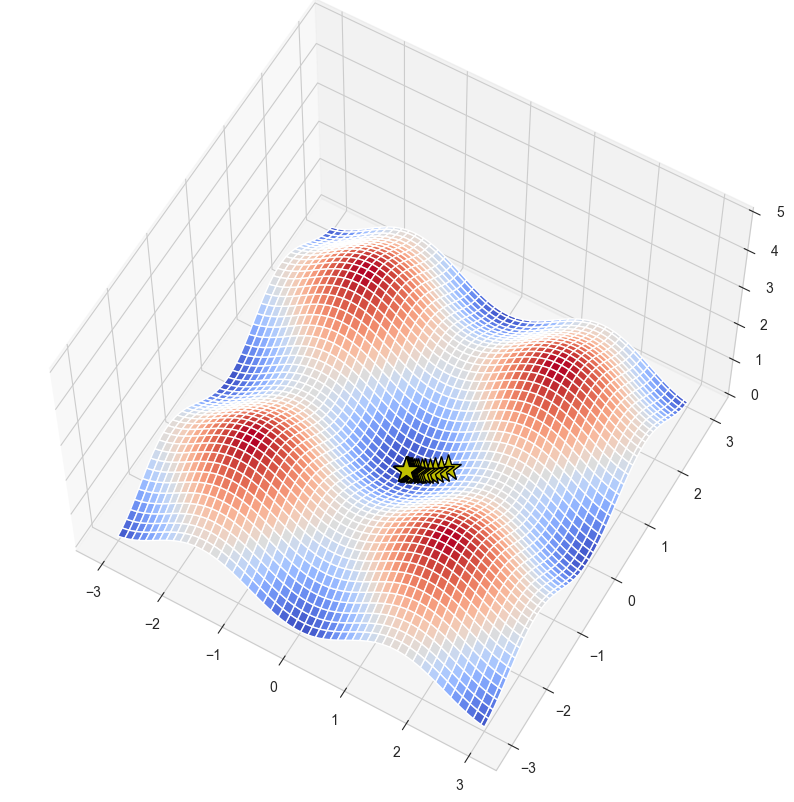

In [8]:
steps = gradient_desc_vis(f, grad_f)

Посмотрим на зависимость значения функции от шага градиентного спуска.

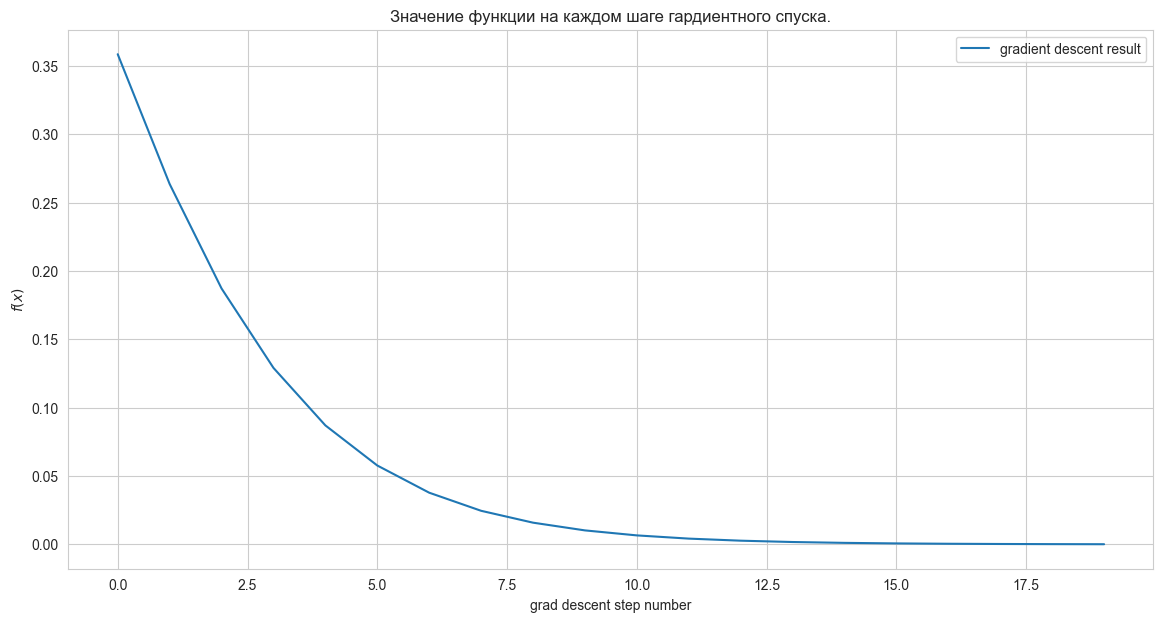

In [9]:
plt.figure(figsize=(14,7))
plt.xlabel("grad descent step number")
plt.ylabel("$f(x)$")
plt.title("Значение функции на каждом шаге гардиентного спуска.")

f_values = list(map(lambda x: x[2], steps))
plt.plot(f_values, label="gradient descent result")
plt.legend();

### Задание 2. Реализация линейной регресии (суммарно 9 баллов)

Так как мы будем использовать градиентный спуск для обучения модели, важной часть является реализация функции потерь и функции для расчета ее градиента. Перем началом стоит напомнить, как считать градиент MSE. Вывод этой формулы можно найти  [здесь](https://medium.com/analytics-vidhya/linear-regression-gradient-descent-intuition-and-math-c9a8f5aeeb22)

$$
    MSE = \frac{1}{N}\sum(y_{true} - y_{pred}) ^ 2
$$

$$
    \nabla{MSE} = \frac{2}{N} X^T (y_{pred} - y_{true})
$$

Здесь имеется в виду именно матричное умножение.

#### Задание 2.1. MSE и ее градиент (2 балла)

In [10]:
def mse(y_true, y_pred):
    """
    Функция потерь MSE.
        :param y_true: np.array[n_samples]: вектор из правильных ответов
        :param y_pred: np.array[n_samples]: вектор из предсказаний модели
        :return: значение функции потерь
    """
    
    if  y_true.shape[0] != y_pred.shape[0]:
        raise ValueError("Number of samples in both vectors should be equal")
        
    mse = (1 / len(y_true)) * sum((y_true - y_pred)**2)
    
    return mse


def mse_grad(y_true, y_pred, X):
    """
    Функция для расчета градиента MSE.
        :param y_true: np.array[n_samples]: вектор из правильных ответов
        :param y_pred: np.array[n_samples]: вектор из предсказаний модели
        :param X: np.array[n_samples, n_features]: матрица объекты x признаки
        :return: градиент функции потерь MSE
    """
    
    if  y_true.shape[0] != y_pred.shape[0]:
        raise ValueError("Number of samples in both vectors should be equal")
        
    mse_gradient = (2 / len(y_true)) * X.T @ (y_pred - y_true)
        
    return mse_gradient


class MSELoss:
    """
    Класс, реализующий функцию потерь MSE. Нужен для того, чтобы
    объединять в одном месте функцию потерь и градиент для нее.
    """
    
    def __call__(self, y_true, y_pred):
        return mse(y_true, y_pred)
    
    def calculate_gradient(self, y_true, y_pred, X):
        return mse_grad(y_true, y_pred, X)

Мы будем использовать следующий класс для расчета градиента наших функций потерь:

In [11]:
class BasicGradientDescent:
    """
    Класс, позволяющий делать шаги градиентного спуска,
    а также рассчитывающих норму градиента.
    """
    
    def __init__(self, loss_function, grad_norm):
        self.loss = loss_function
        self.grad_norm = grad_norm
        
    
    def step(self, y, y_pred, X):
        
        
        grad_i = self.loss.calculate_gradient(y, y_pred, X)
        grad_i_norm = self._calculate_grad_norm(grad_i)
        
        return grad_i, grad_i_norm
            
            
    def _calculate_grad_norm(self, grad_i):
        if self.grad_norm == "l1":
            return np.abs(grad_i).sum()
        elif self.grad_norm == "l2":
            return np.sqrt(np.square(grad_i).sum())
        else:
            raise ValueError(f"I can't calculate {self.grad_norm} norm of gradient")

В данном задании нужно будет реализовать линейную регрессию и обучить ее при помощи градиентного спуска. Для этого нужно будет заполнять пропуски кода в соответствующих классах. Для начала мы реализуем базовый класс для всех линейных моделей, от которого потом будем наследоваться при реализации линейной и логистической регресий. Не переживайте, этот класс уже реализован, вам достостаточно просто разобраться с кодом.

In [12]:
class BaseLinearModel:
    """
    Класс, который представляет из себя базовую линейную модель, наследуюясь от которого, мы будем
    реализовывать линейную и логистическую регрессии.
    """
    
    def __init__(self, learning_rate, 
                 loss_function, fit_intercept,
                 n_iter, tol, optimizer, grad_norm):
        """
        Конструктор нашего класса. 
            :param learning_rate: скорость обучения
            :param loss_function: функция потерь (MSE или кросс-энтропия)
            :param fit_intercept: нужно ли нам включать свободных член в модель
            :param n_iter: количество итераций градиентного спуска
            :param tol: параметр для остановки градиентного спуска,
                        если норма градиента (l1 или l2) меньше tol, то останавливаемся
            :param optimizer: класс, который будет рассчитывать градиент и его норму
            :param grad_norm: тип нормы градиента l1 или l2
        """
        
        self.learning_rate = learning_rate
        self.loss = loss_function
        self.fit_intercept = fit_intercept
        self.n_iter = n_iter
        self.tol = tol
        self.grad_norm = grad_norm
        self.optimizer = optimizer(loss_function, grad_norm)
        
        # В начале параметры модели не заданы
        self.W = None
        
        
    def fit(self, X, y):
        """
        Метод для обучения нашей модели 
            :param X: матрица объекты x признаки
            :param y: вектор значений целевой переменной
            :return: обученная модель
        """
        
        # Сделаем из y вектор-столбец (n_samples, 1)
        y = y.reshape(-1, 1)
        n_samples = X.shape[0]
        
        # Добавим колонку из 1 в матрицу X
        if self.fit_intercept:
            ones_column = np.ones((n_samples, 1))
            X_new = np.hstack((ones_column, X))
        
        n_features = X_new.shape[1]
        
        # Инициализируем веса модели
        if self.W is None:
            self.W = np.random.randn(n_features, 1)
        
        # Обучаем модель градиентным спуском
        for i in range(self.n_iter):
            y_pred = self.predict(X)
            grad_i, grad_i_norm = self.optimizer.step(y, y_pred, X_new)
            
            # Если градиент близок к 0, останавливаемся
            if grad_i_norm <= self.tol:
                return self
            
            else:
                self.W -= self.learning_rate * grad_i
        
        return self
    
    
    def predict(self, X):
        raise NotImplementedError("It is a basic class for all linear models. You should implement it for descendant class.")
    
    
    def __repr__(self):
        return "Base linear model without prediction skill :("

#### Задание 2.2. Предсказания линейной регрессии (3 балла)

Реализуйте метод `predict` у класса `CustomLinearRegression`, не забудьте про свободный член!

In [13]:
class CustomLinearRegression(BaseLinearModel):
    def __init__(self, learning_rate: float = 1e-2, 
                 loss_function=MSELoss(), fit_intercept=True,
                 n_iter=1000, tol=1e-5, optimizer=BasicGradientDescent, grad_norm="l1"):
        
        # Если вы не проходили наследование и в частности `super`, то не страшно
        # коротко, с помощью этого мы можем вызывать методы родительского класса
        # в частности здесь мы используем метод `init`
        super().__init__(learning_rate=learning_rate, 
                         loss_function=loss_function, fit_intercept=fit_intercept,
                         n_iter=n_iter, tol=tol, optimizer=optimizer, grad_norm=grad_norm)
        
        
    def predict(self, X_test):
        """
        Метод для вычисления предсказаний 
            :param X_test: np.array[n_test_samples, n_features]: 
                           матрица объекты x признаки (тестовый датасет)
            :return: y_pred: np.array[n_test_samples, 1]: предсказания модели
        """
        
        if self.W is None:
            raise NotFittedError("This CustomLinearRegression instance is not fitted yet, run fit method.")
        
        n_test_samples = X_test.shape[0]
        
        if self.fit_intercept:
            ones_column = np.ones((n_test_samples, 1))
            X_test = np.hstack((ones_column, X_test))
        
        y_pred = X_test @ self.W

        return y_pred   
    
    
    def __repr__(self):
        return "My custom linear regression"

##### Проверим нашу реализацию на простом примере

In [14]:
X = np.random.randn(100, 1)
y = 2 * X + 5 + 0.5 * np.random.randn(100, 1)

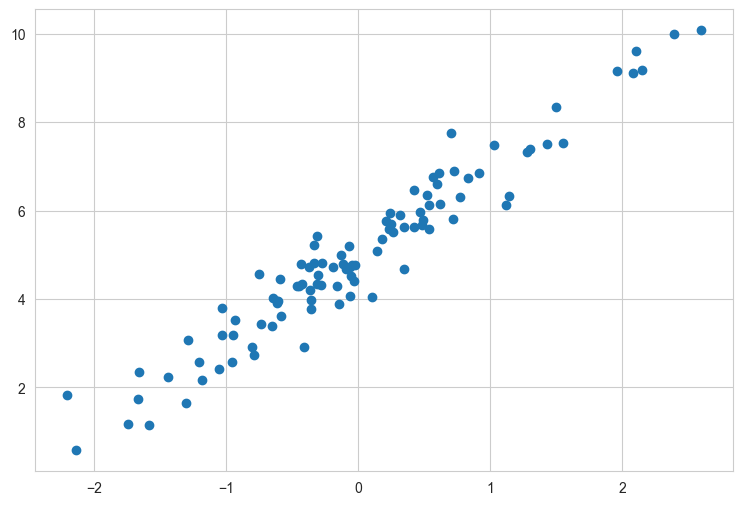

In [15]:
plt.scatter(X, y);

In [16]:
custom_lin_reg = CustomLinearRegression()

In [17]:
custom_lin_reg.fit(X, y)

My custom linear regression

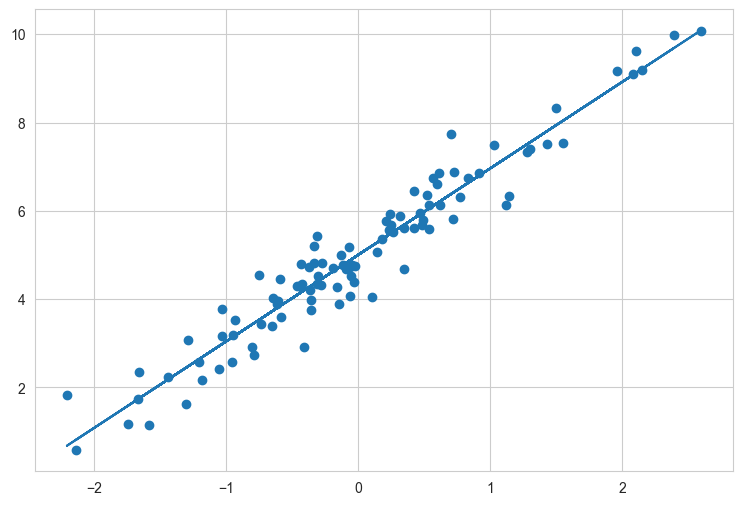

In [18]:
plt.scatter(X, y)
plt.plot(X, custom_lin_reg.predict(X));

#### Задание 2.3. Используем встроенную линейную регрессию (4 балла)

Поработаем с данными о ценах на дома в Калифорнии. Постройте модель линейной регресии при помощи `LinearRegression` из `sklearn`. Не забудьте разделить данные на тренировочную и тестовую части, а также правильно предобработать признаки. В конце воспользуйтесь какими-то изученными метриками регресии и сделайте выводы о качестве полученной модели, а также о том, какие признаки наиболее важны с точки зрения полученной модели.

In [19]:
data = fetch_california_housing()
X, y = data["data"], data["target"]
feature_names = data["feature_names"]
X, y = pd.DataFrame(X, columns=feature_names), pd.DataFrame(y, columns = ['MedHouseVal'])

Ваш ход:

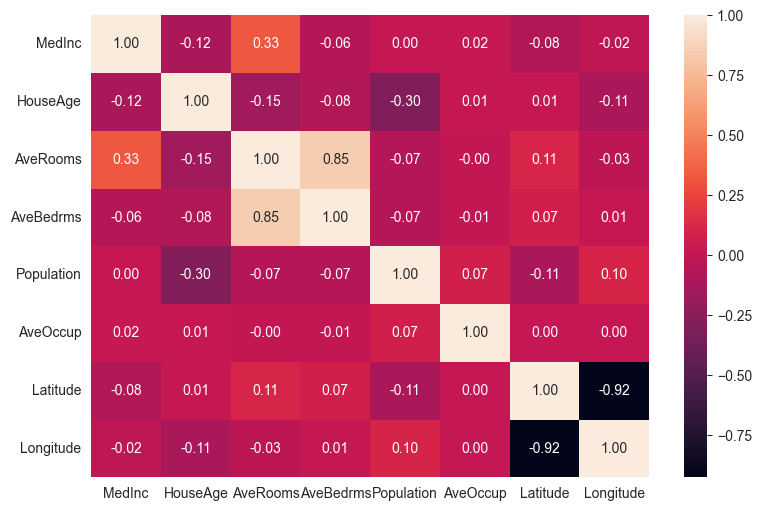

In [20]:
sns.heatmap(X.corr(), annot=True, fmt='.2f');

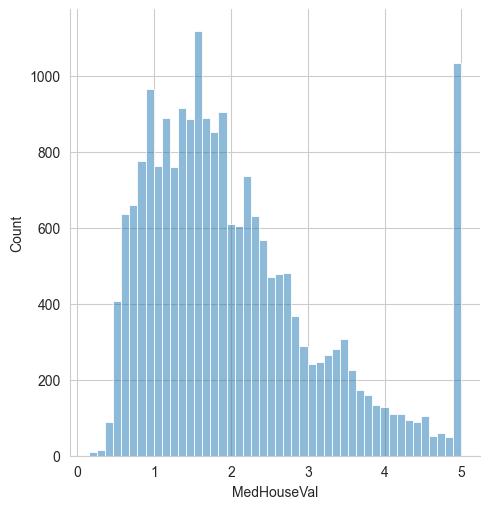

In [21]:
sns.displot(y, legend=False, kind='hist');
plt.xlabel('MedHouseVal');

In [22]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


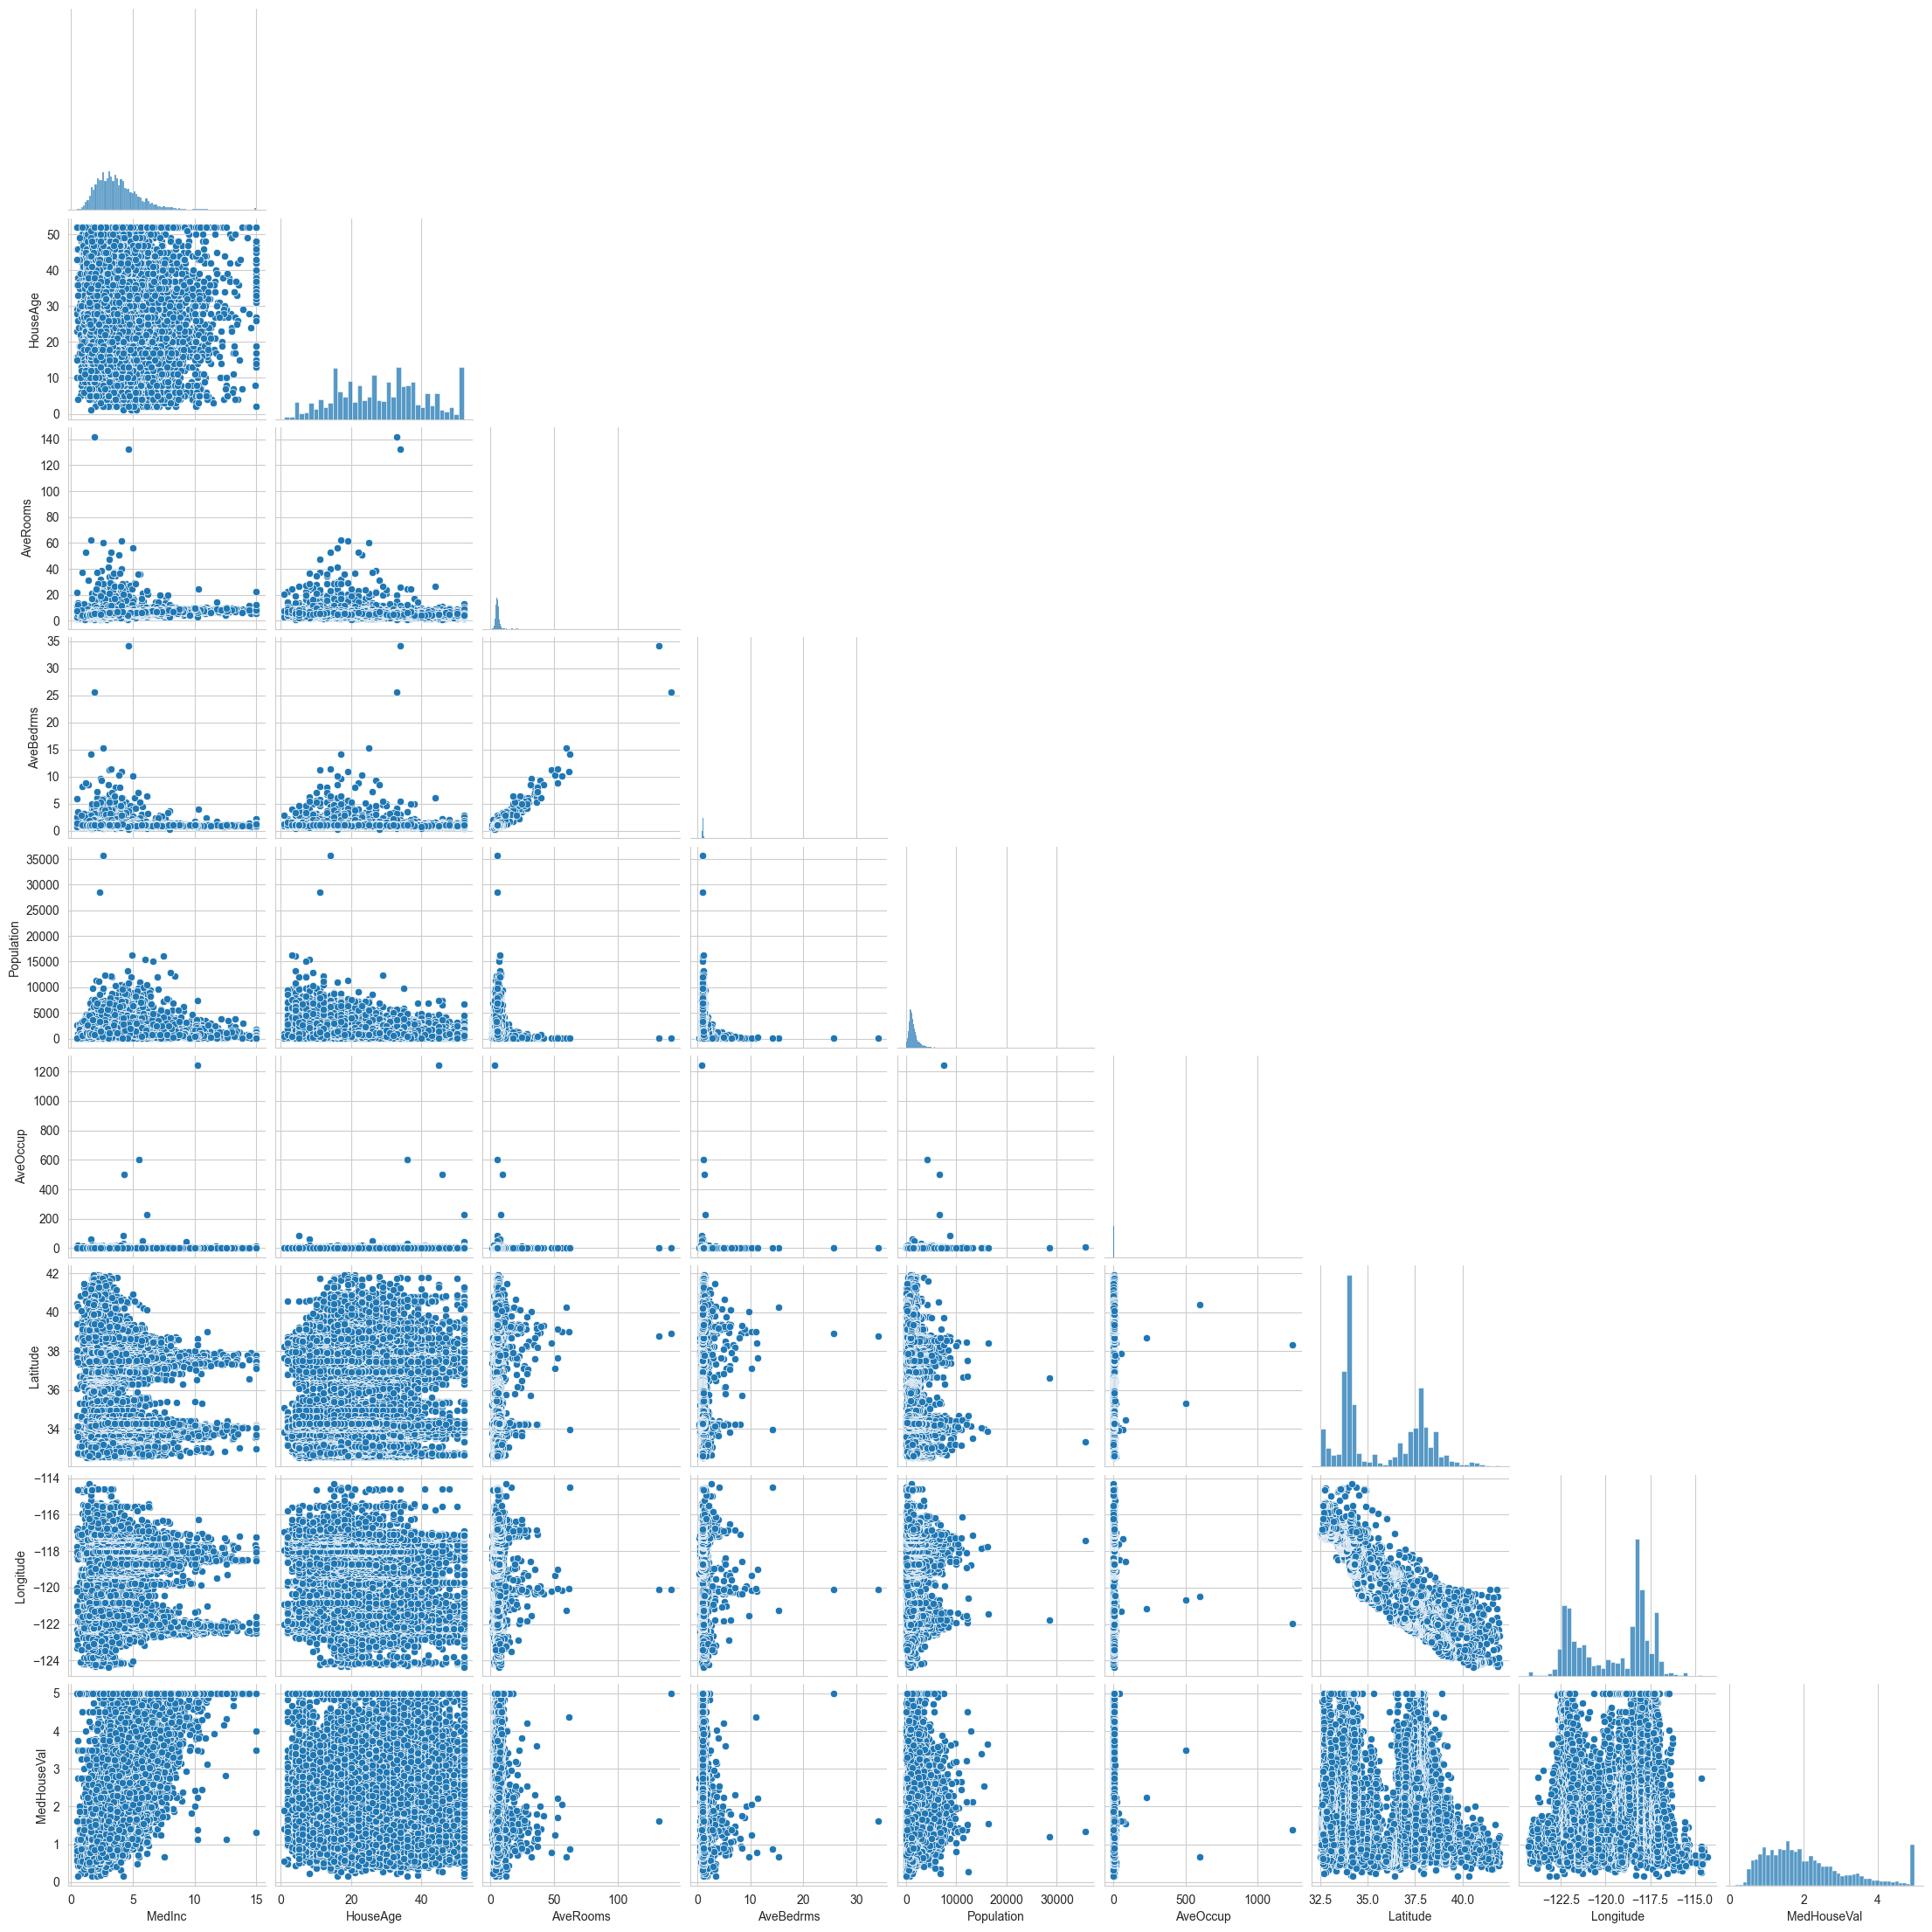

In [24]:
sns.pairplot(pd.concat([X, y], axis = 1), corner=True);

### Удалим выбросы

In [25]:
import statsmodels.api as sm

In [26]:
model = sm.OLS(y, X)
results = model.fit()

In [27]:
influence = results.get_influence()
cooks = influence.cooks_distance
n_deviations = (cooks[1] < 0.05).sum() 
print(f'There are {n_deviations} significant deviations')

There are 3 significant deviations


In [28]:
X = X[cooks[1] > 0.05]
y = y[cooks[1] > 0.05]

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
def vif(preds):
    vif_data = pd.DataFrame()
    vif_data["Predictor"] = preds.columns
    vif_data["VIF"] = [variance_inflation_factor(preds.values, i) for i in range(len(preds.columns))]
    return vif_data

In [31]:
vif(X)

,Predictor,VIF
0,MedInc,12.066910
1,HouseAge,7.251138
2,AveRooms,47.230126
3,AveBedrms,47.645121
4,Population,2.947106
5,AveOccup,1.280094
6,Latitude,562.738335
7,Longitude,643.088561


In [32]:
X_new = X.drop(columns = ['MedInc', 'AveBedrms'])
vif(X_new)

,Predictor,VIF
0,HouseAge,7.211901
1,AveRooms,8.095941
2,Population,2.947012
3,AveOccup,1.279605
4,Latitude,514.327182
5,Longitude,543.183136


**Оставим так и посмотрим**

## PIPELINE

In [33]:
pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("regressor", LinearRegression())
])

#### "Усеченная" модель

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.1)

In [35]:
fitted = pipeline.fit(X_train, y_train);

In [36]:
y_pred = pipeline.predict(X_test)

In [37]:
print(f'R squred: {r2_score(y_test, y_pred)}')

R squred: 0.33310690720069547


#### Полная модель

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [39]:
fitted = pipeline.fit(X_train, y_train);

In [40]:
y_pred = pipeline.predict(X_test)

In [41]:
print(f'R squred: {r2_score(y_test, y_pred)}')

R squred: 0.6266629326563269


**Пожалуй, оставим полную модель...**

MedHouseVal    1.797
dtype: float64 1.9933249672922173


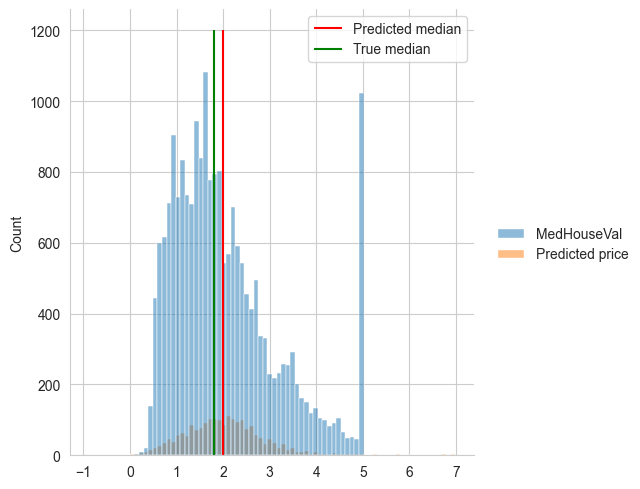

In [42]:
comparison_y = pd.concat([y, pd.DataFrame(y_pred)], axis = 1).rename(columns = {0 : 'Predicted price'})
sns.displot(comparison_y, legend=True);

y_pred_median = np.median(y_pred)
y_median = y.median()

plt.vlines(x=y_pred_median, ymin=0, ymax = 1200, color='red', label='Predicted median');
plt.vlines(x=y_median, ymin=0, ymax = 1200, color='green', label='True median');
plt.legend();

print(y_median, y_pred_median)

**Модель недопредсказывает очень дорогие дома, (как и ожидалось) + виден сдвиг медианы, что говорит о сдвиге предсказанных цен домов**

### Задание 3. Реализация логистической регресии (суммарно 10 баллов)

Логистическая регрессия не очень сильно отличается от обычной линейной регрессии и используется в задах классификации. Так как здесь мы снова будем пользоваться градиентным спуском, то нужно определить функцию потерь и ее градиент. Одним из самых популярных вариантов в задаче бинарной классификации является бинарная кросс-энтропия (BCE).

$$\mathcal L_{BCE}(y, \hat y) = -\sum_i \left[y_i\log\sigma(\hat y_i) + (1-y_i)\log(1-\sigma(\hat y_i))\right].$$

где $y$ это  таргет желаемого результата и $\hat y$ является выходом модели. $\sigma$ - это [*логистическая* функция](https://en.wikipedia.org/wiki/Sigmoid_function), который преобразует действительное число $\mathbb R$ в вероятность $[0,1]$.

Единственная проблема данной функции это возможность получить 0 под знаком логарифма, что не очень хорошо. Попробуем справить с этим "в лоб". Скажем, что наши предсказания могут принимать значения от 0 + eps до 1 - eps, где eps очень маленькое число.

#### Задание 3.1. Реализация сигмоиды (0.5 баллов)

Реализуйте функцию `sigmoid`, которая переводит действительное число $\mathbb R$ в вероятность $[0,1]$.

In [43]:
def sigmoid(output):
    # output результат X@w (-inf, +inf)

    return 1 / (1 + np.exp(-output))

#### Задание 3.2. BCE Loss и ее градиент (2.5 балла)

Так как мы с вами только начинаем изучать машинное обучение, то было бы слишком жестоко просить вас вычислить градиент BCE Loss (он не так сложен, просто нужно привыкнуть). Поэтому сразу напишем формулу для него:

$$
\nabla{\mathcal L_{BCE}(y, \hat y), X} = X^T (\sigma({\hat{y}}) - y)
$$

In [44]:
def bce(y_true, y_pred, eps=1e-15):
    """
    Функция потерь BCE.
        :param y_true: np.array[n_samples]: вектор из правильных ответов 0/1
        :param y_pred: np.array[n_samples]: вектор из предсказаний модели (вероятности)
        :return: значение функции потерь
    """
    
    if  y_true.shape[0] != y_pred.shape[0]:
        raise ValueError("Number of samples in both vectors should be equal")
        
    n = y_true.shape[0]
    
    # So I want escape log(0)
    y_pred = np.clip(y_pred, eps, 1 - eps)
    
    bce = - (1 / len(y_true)) * sum(y_true * np.log(y_pred) + (1 - y_true) * log(1 - y_pred))
    
    return bce
    

def bce_grad(y_true, y_pred, X):
    """
    Функция потерь BCE.
        :param y_true: np.array[n_samples]: вектор из правильных ответов 0/1
        :param y_pred: np.array[n_samples]: вектор из предсказаний модели (вероятности)
        :param X: np.array[n_samples, n_features]: матрица объекты x признаки
        :return: значение функции потерь
    """
    
    if  y_true.shape[0] != y_pred.shape[0]:
        raise ValueError("Number of samples in both vectors should be equal")
        
    grad_bce = X.T @ (y_pred - y_true)
    
    return grad_bce


class BCELoss:
    """
    Класс, реализующий функцию потерь BCE. Нужен для того, чтобы
    объединять в одном месте функцию потерь и градиент для нее.
    """
    
    def __call__(self, y_true, y_pred):
        return bce(y_true, y_pred)
    
    def calculate_gradient(self, y_true, y_pred, X):
        return bce_grad(y_true, y_pred, X)

#### Задание 3.3. Предсказания логистической регрессии (2 балла)

Реализуйте метод `predict` у класса `CustomLogisticRegression`, не забудьте про свободный член!

In [45]:
class CustomLogisticRegression(BaseLinearModel):
    def __init__(self, learning_rate: float = 1e-3,
                 loss_function=BCELoss(), fit_intercept=True,
                 n_iter=1000, tol=1e-5, optimizer=BasicGradientDescent, grad_norm="l1"):
        
        super().__init__(learning_rate=learning_rate,
                         loss_function=loss_function, fit_intercept=fit_intercept,
                         n_iter=n_iter, tol=tol, optimizer=optimizer, grad_norm=grad_norm)
    
    
    def predict(self, X_test):
        if self.W is None:
            raise NotFittedError("This CustomLogisticRegression instance is not fitted, run fit method.")
        
        n_test_samples = X_test.shape[0]
        if self.fit_intercept:
            ones_column = np.ones((n_test_samples, 1))
            X_test = np.hstack((ones_column, X_test))
            
        sigma = sigmoid(X_test @ self.W)
        y_pred = np.array([1 if y > 0.5 else 0 for y in sigma]).reshape(-1, 1)
        
#         print(sigma[0], y_pred[0])
        
        return y_pred
    
    def __repr__(self):
        return "My custom logistic regression"

#### Снова проверим работу алгоритма на простом примере

In [46]:
# Создадим датасет из 1 признака и 2 классов
X, y = make_classification(n_features=1, n_informative=1,
                           n_redundant=0, n_clusters_per_class=1)

In [47]:
plt.rcParams["figure.figsize"] = 9, 6

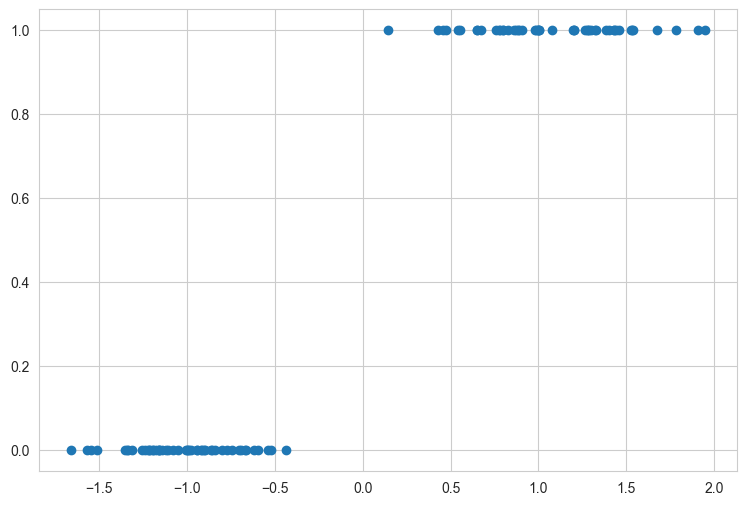

In [48]:
plt.scatter(X, y);

In [49]:
custom_log_reg = CustomLogisticRegression()
custom_log_reg.fit(X, y)
y_pred = custom_log_reg.predict(X)

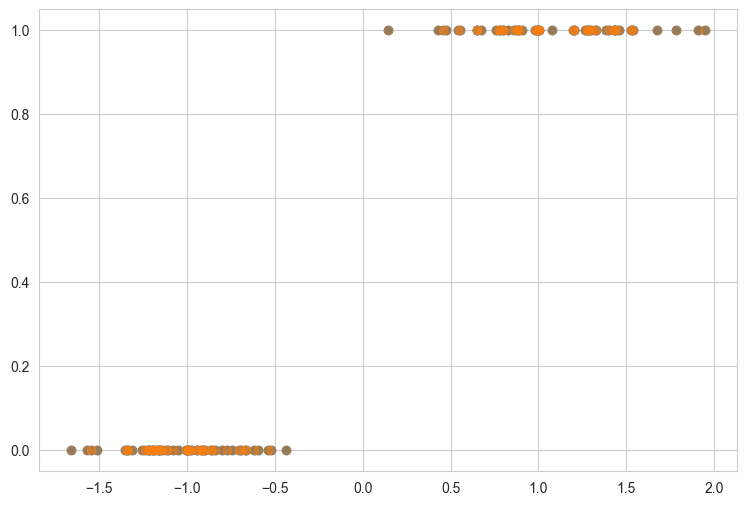

In [50]:
plt.scatter(X, y)
plt.scatter(X, y_pred,  alpha = 0.5);

Проверьте качество работы модели при помощи известных вам метрик бинарной классификации.

In [51]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [52]:
print(f'precision = {precision_score(y, y_pred)}\nrecall = {recall_score(y, y_pred)}\naccuracy = {accuracy_score(y, y_pred)}')

precision = 1.0
recall = 1.0
accuracy = 1.0


ЧУДЕСА!

#### Задание 3.4. Применение логистической регрессии (5 баллов)

Мы будем использовать данные по свойствам покемонов (https://www.kaggle.com/abcsds/pokemon). В данном задании вам необходимо сначала сделать краткий EDA (Посмотреть на данные и их распределения, а также посмотреть, как различные признаки связаны между собой и с целевой переменной (`Legendary`)).

In [53]:
pokemon = pd.read_csv("../data/Pokemon.csv", index_col=0).rename(columns = {"Type 1": "Type_1", "Type 2": "Type_2"})
pokemon.head()

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Мы будем предсказывать является ли покемон легендарным или нет. Замените логическое значение колонки на числовое (перекодировав на 0 и 1). Также подумайте, как в этом случае лучше закодировать категориальные признаки (может быть, лучше их просто выбросить?).

### small EDA

In [54]:
pokemon.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [55]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 721
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type_1      800 non-null    object
 2   Type_2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 75.8+ KB


In [56]:
pokemon.Type_1.nunique()

18

In [57]:
pokemon.Type_2.nunique()

18

In [58]:
pokemon.Generation.unique()

array([1, 2, 3, 4, 5, 6])

**Я решил убрать из предикторов имена покемонов**

In [59]:
X = pokemon.iloc[:, 1:-1]
X

,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
#,,,,,,,,,,
1,Grass,Poison,318,45,49,49,65,65,45,1
2,Grass,Poison,405,60,62,63,80,80,60,1
3,Grass,Poison,525,80,82,83,100,100,80,1
3,Grass,Poison,625,80,100,123,122,120,80,1
4,Fire,NaN,309,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...,...,...
719,Rock,Fairy,600,50,100,150,100,150,50,6
719,Rock,Fairy,700,50,160,110,160,110,110,6
720,Psychic,Ghost,600,80,110,60,150,130,70,6


In [60]:
y = pokemon.iloc[:, -1]
y.astype('int64')

#
1      0
2      0
3      0
3      0
4      0
      ..
719    1
719    1
720    1
720    1
721    1
Name: Legendary, Length: 800, dtype: int64

Разделите ваши данные на тестовую и тренировочную выборку.

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Обучите модель `LogisticRegression` из `sklearn`.

### Попробуем перекодировать категориальные переменные с помощью OneHotEncoder

In [62]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [63]:
transformer = ColumnTransformer(transformers=[("encoder", OneHotEncoder(drop='first'), 
                                               ["Type_1", "Type_2", "Generation"])])

In [64]:
log_pipeline = pipeline = Pipeline(steps=[
    ("transform", transformer),
    ("regressor", LogisticRegression())
])

In [65]:
fitted = log_pipeline.fit(X_train, y_train);

In [66]:
y_pred = log_pipeline.predict(X_test)

Выведите метрики вашего классификатора:

1. Нарисуйте [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html).

2. Изобразите ROC кривую и посчитайте площадь под ней.

3. Скажите, какие признаки оказались наиболее важны для модели.

### Посмотрим метрики модели с перекодированными категориальными перменными

**Оставил только accuracy, так как очень много TN**

In [67]:
print(f'Accuracy = {accuracy_score(y_test, y_pred)}')

Accuracy = 0.91875


In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

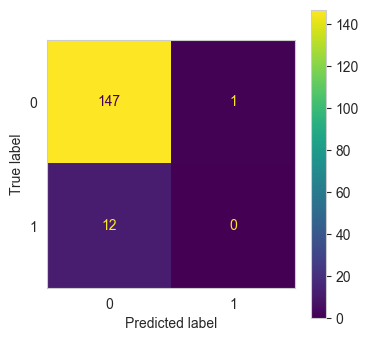

In [69]:
plt.rcParams['figure.figsize'] = (4,4)

cf_mat = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cf_mat).plot();
plt.grid(False);


In [70]:
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

### Высчитаем вероятности

In [71]:
y_prob = log_pipeline.predict_proba(X_test)

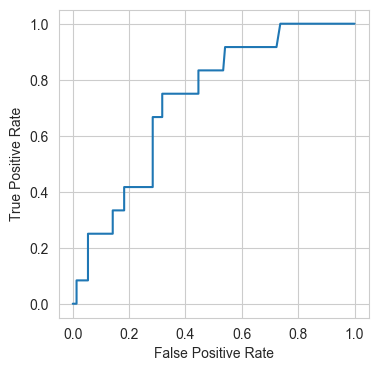

In [72]:
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1]);
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [73]:
score = roc_auc_score(y_test, y_prob[:, 1])
print(f"AUC: {score:.4}")

AUC: 0.7227


### А что если оставить только непрерывные предикторы ?

In [74]:
X_new = X.drop(columns = ["Type_1", "Type_2", "Generation"])

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)

In [76]:
log_regressor = LogisticRegression()
fitted_log = log_regressor.fit(X_train, y_train);

In [77]:
y_pred = log_regressor.predict(X_test)

In [78]:
print(f'precision = {precision_score(y_test, y_pred)}\nrecall = {recall_score(y_test, y_pred)}\naccuracy = {accuracy_score(y_test, y_pred)}')

precision = 0.875
recall = 0.5833333333333334
accuracy = 0.9625


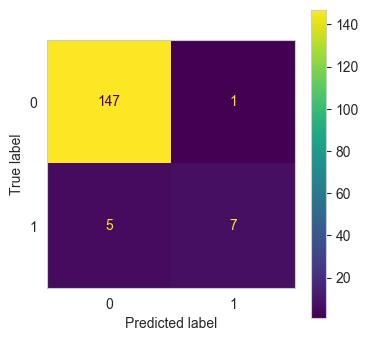

In [79]:
plt.rcParams['figure.figsize'] = (4,4)

cf_mat = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cf_mat).plot();

plt.grid(False);

In [80]:
y_prob = log_regressor.predict_proba(X_test)

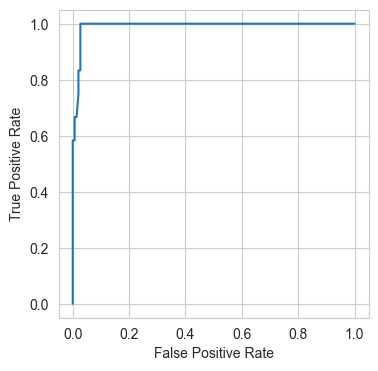

In [81]:
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1]);
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [82]:
score = roc_auc_score(y_test, y_prob[:, 1])
print(f"AUC: {score:.4}")

AUC: 0.9918


#### Кажется, что такая модель показывает себя лучше

### Какой предиктор важнее?

In [83]:
cor_df = pd.concat([X_new, y], axis = 1).corr()
cor_df

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.501758
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.273620
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.345408
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.246377
Sp. Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.448907
Sp. Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.363937
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,0.326715
Legendary,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,1.000000


In [84]:
coefs = pd.DataFrame(fitted_log.coef_.round(5).reshape(-1, 1))
coefs.index = pd.DataFrame(cor_df.iloc[:, -1]).iloc[:-1, :].index
pd.concat([pd.DataFrame(cor_df.iloc[:, -1]).iloc[:-1, :], coefs], axis = 1).rename(columns = {"Legendary": 'Correlation', 0: "Coeficient"})

,Correlation,Coeficient
Total,0.501758,0.02795
HP,0.273620,0.00396
Attack,0.345408,-0.00966
Defense,0.246377,-0.00205
Sp. Atk,0.448907,0.00216
Sp. Def,0.363937,0.01368
Speed,0.326715,0.01987


Могу предположить, что важным предиктором является **Total**, но его нельзя срвнить с другими, так как данные не нормализованы. Однако остальные предикоры измерены примерно в одних и тех же единицах. Если сравнивать остальные предикторы друг с другом, то **Sp. Def** и **Speed** выглядят как наиболее важные предикторы.

In [85]:
cor_df = pd.concat([X_new, y], axis = 1).corr()
cor_df

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.501758
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.273620
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.345408
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.246377
Sp. Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.448907
Sp. Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.363937
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,0.326715
Legendary,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,1.000000


In [86]:
coefs = pd.DataFrame(fitted_log.coef_.round(5).reshape(-1, 1))
coefs.index = pd.DataFrame(cor_df.iloc[:, -1]).iloc[:-1, :].index
pd.concat([pd.DataFrame(cor_df.iloc[:, -1]).iloc[:-1, :], coefs], axis = 1).rename(columns = {"Legendary": 'Correlation', 0: "Coeficient"})

,Correlation,Coeficient
Total,0.501758,0.02795
HP,0.273620,0.00396
Attack,0.345408,-0.00966
Defense,0.246377,-0.00205
Sp. Atk,0.448907,0.00216
Sp. Def,0.363937,0.01368
Speed,0.326715,0.01987


Могу предположить, что важным предиктором является **Total**, но его нельзя срвнить с другими, так как данные не нормализованы. Однако остальные предикоры измерены примерно в одних и тех же единицах. Если сравнивать остальные предикторы друг с другом, то **Sp. Def** и **Speed** выглядят как наиболее важные предикторы.

### Задание 4. Расскажите о вашей любимой музыкальной группе (исполнителе) (0.5 балла)

Расскажите, как вы познакомились с этой группой и скиньте несколько наиболее любимых треков)

**[ССЫЛКА НА ПЛЕЙЛИТ С ЭТИМИ ПЕСНЯМИ НА YOUTUBE](https://www.youtube.com/playlist?list=PLqPyALhVgrcFE-pN06X7oyCIyogUC8Zd3)**

- Истома (Особенно песни - Кофе, Твои вещи, Ди Каприо)
- Сироткин (Особенно песни - Планы на это лето, Выше домов)
- Sam Fender (Особенно песни - Seventeen going under, Spit of You)


## Therapy time

Напишите здесь ваши впечатления о задании: было ли интересно, было ли слишком легко или наоборот сложно и тд. Также сюда можно написать свои идеи по улучшению заданий, а также предложить данные, на основе которых вы бы хотели построить следующие дз. 

**Ваши мысли:**

Интересно! Жаль что на лекции не прошли ROC AUC